# Playground
Looking at some pilot data from the BR experiment

In [12]:
# important libraries

# use the os
import os
import glob
# math and data structure
import numpy as np
import pandas as pd
# plotting
import matplotlib.pyplot as plt
import seaborn as sns

import pingouin as pg

### Directories

In [13]:
root_dir = os.path.join('..','..')
data_dir = os.path.join(root_dir, 'rawdata')
results_dir = os.path.join(root_dir, 'derivatives')
if not os.path.exists(results_dir):
    os.mkdir(results_dir)

### Subjects

In [14]:
# get all subjects
subjects_fullpath = glob.glob(os.path.join(data_dir, 'sub-*'))

# example subject
sub = subjects_fullpath[1]

#### Concatenate runs

In [15]:
runs = glob.glob(os.path.join(sub,'*.csv'))
runs.sort()

In [16]:
sub_df = pd.DataFrame()

for r,run in enumerate(runs):
    # read in the csv from the run
    curr_run = pd.read_csv(run)
    # add a column with the run number
    curr_run['run'] = r+1
    
    # concatenate the run into one big dataframe
    sub_df = pd.concat([sub_df, curr_run],ignore_index=True)
    
# add the color as condition
stim_colors = [stim.split('_')[0] for stim in sub_df.stimulus]
stim_identities = [stim.split('_')[1].split('.')[0] for stim in sub_df.stimulus]
sub_df['color'] = stim_colors
sub_df['object'] = stim_identities

### Plotting

In [17]:
df_piv = sub_df.pivot_table(index='percepts',
                            columns=['color','run'],
                            values='durations',
                            aggfunc='sum')

agg_df = df_piv.melt(ignore_index=False, value_name='durations').reset_index()
agg_df

,percepts,color,run,durations
0,false_color,blue,1,30.441947
1,mixed,blue,1,20.789301
2,true_color,blue,1,12.936272
3,false_color,blue,2,44.124046
4,mixed,blue,2,30.517134
...,...,...,...,...
82,mixed,yellow,5,27.381973
83,true_color,yellow,5,15.896656
84,false_color,yellow,6,NaN
85,mixed,yellow,6,37.870460


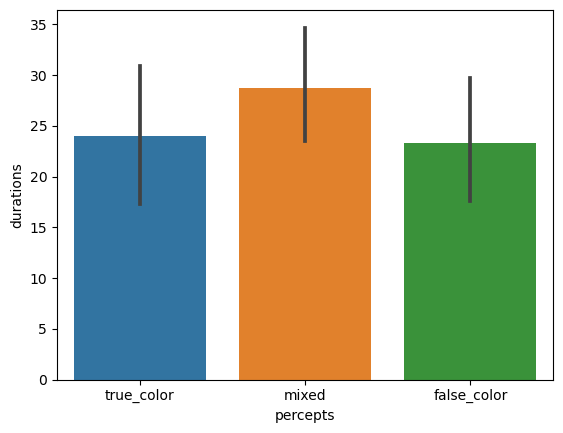

In [18]:
fig = plt.figure()
sns.barplot(data=agg_df, x='percepts',y='durations',order=['true_color','mixed','false_color'])
fig.savefig('test.png')

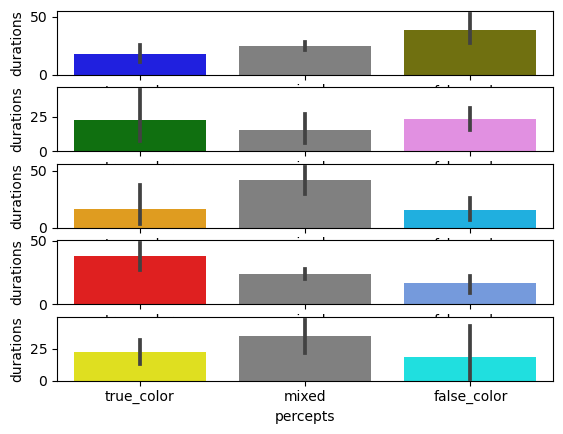

In [19]:
fig = plt.figure()
inverse_colors = ['olive','violet','deepskyblue','cornflowerblue','cyan']
for c, color in enumerate(np.unique(agg_df.color)):
    ax = plt.subplot(5,1,c+1)
    curr_data = agg_df[agg_df.color==color]
    sns.barplot(data=curr_data, 
                x='percepts',
                y='durations',
                order=['true_color','mixed','false_color'],
                palette=[color,'grey',inverse_colors[c]],
                ax=ax)
fig.savefig('test2.png')

In [20]:
mask = sub_df.object!=sub_df.object.shift(1)
indices = np.where(mask)[0]
indices

array([  0,  23,  70, 103, 142, 177, 196, 207, 230, 245, 330, 355, 372,
       397, 424, 435, 486, 489, 506, 545, 560, 589, 612, 639, 646, 663,
       686, 699, 712])

In [22]:
len(sub_df.percepts.iloc[indices])

29